<div style="background-color: lightgrey; padding: 10px">
<html>
  <body>
    <h1 style="font-family: 'Times New Roman', Times, serif;">Diagnosis of Chronic Kidney Disease using Predictive Analysis</h1>
  </body>
</html>
</div>



In [1]:
import warnings
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt


from ipywidgets import widgets
# ignore all warnings
warnings.filterwarnings('ignore')

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="View Code"></form>''')



<html>
  <head>
    <h1 id="section1" style="font-family: 'Times New Roman', Times, serif;">Table of Contents</h1>
  </head>
</html>

- [1: Exploratory Data Analysis](#section-1)
  - [1.1:Desciptive Statistics](#subsection-1-3)
  - [1.2:Missing Value Treatment](#subsection-1-1)
  - [1.3:Outlier Detection](#subsection-1-2)
  - [1.4:Data Visualization](#subsection-1-3)
  
- [2: Baseline Characteristics](#section-2)
  - [2.1: Insights](#subsection-2-1)
- [3: Predictive Modelling](#section-3)
    - [3.1:Logistic Regression](#subsection-3-1)
    - [3.2:Support Vector Machine](#subsection-3-2)
    - [3.3:Decision Tree](#subsection-3-3)
    - [3.3:Model Comparison](#subsection-3-4)
- [4: Conclusion](#section-4)

<div style="background-color: lightgrey; padding: 10px">
<html>
  <head>
    <h2 id="section1" style="font-family: 'Times New Roman', Times, serif;">1: Exploratory Data Analysis</h2>
      <body style="font-family: 'Times New Roman', Times, serif;">
          Treating the data to address missing values, outliers before performing the analysis.
      </body>
  </head>
</html>
    </div>

In [2]:
text_input = input("Enter path of the dataset: ")
# Load Excel file into DataFrame
df = pd.read_csv(text_input)
# replace missing values with NaN
df.replace('?', np.nan, inplace=True)
# Display descriptive statistics of each column as a table
df.head()
#sample path

Enter path of the dataset: /Users/lawshia/Downloads/kidney.csv


,age,blood pressure,specific gravity,albumin,Sugar,Red Blood Cells(nominal),Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48,80,1.02,1,0,NaN,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


<div style="background-color: lightgrey; padding: 10px">
<html>
  <head>
    <h4 id="subsection-1-1" style="font-family: 'Times New Roman', Times, serif;">1.1: Desciptive Statistics</h4>
      <body style="font-family: 'Times New Roman', Times, serif;">
          The descriptive statistics of the data.
      </body>
  </head>
</html>
</div>

In [3]:


from IPython.display import HTML

# Define the title widget
title_widget = widgets.HTML(
    value='<h2 style="font-family: Times New Roman; font-size: 20px; color: black; font-weight: bold;">Select categorical variables</h2>'
)

# Create a list of checkbox widgets, one for each column in the DataFrame
checkboxes = [widgets.Checkbox(description=col) for col in df.columns]

# Combine the checkboxes into a vertical box container
checkbox_vbox = widgets.VBox(children=checkboxes)

# Display the title and the checkboxes
display(title_widget)
display(checkbox_vbox)


HTML(value='<h2 style="font-family: Times New Roman; font-size: 20px; color: black; font-weight: bold;">Select…

In [4]:
from IPython.display import display, HTML

# Create a button
button = """
        <button onclick="var cells = IPython.notebook.get_cells(); 
        var current_cell_idx = IPython.notebook.get_selected_index(); 
        IPython.notebook.select(current_cell_idx+1); 
        cells[current_cell_idx+1].execute();">
        To get descitpive statistics of categorical variables</button>
        """

# Display the button
display(HTML(button))

In [10]:
import numpy as np
import itertools
import pandas as pd

# Get the selected checkbox values as a list
selected_cols = [checkbox.description for checkbox in checkboxes if checkbox.value]

tables = []
for col in selected_cols:
    # get the distribution of values in the column
    distribution = df[col].value_counts(dropna=False)
    final_table = distribution.to_frame()
    final_table['Percentage'] = (df[col].value_counts(normalize=True, dropna=False)*100)   
    final_table = final_table.rename(columns={col: 'N'})  # Rename second column to "N"

    # create a styled table with light teal-colored column and black boundary
    styled_table = final_table.style.set_table_styles([{'selector': 'th', 'props': [('background-color', 'lightcyan'), ('border', '1px solid black')]}]).set_caption(f'<span style="color:black">{col}</span>')
    tables.append(styled_table)

# display tables in two columns with black boundary
for i in range(0, len(tables), 2):
    if i == len(tables) - 1:
        # if there's an odd number of tables, display the last one separately
        display(tables[i].set_properties(**{'border': '1px solid black'}))
    else:
        # display two tables side by side with black boundary
        display(tables[i].set_properties(**{'border': '1px solid black'}), tables[i+1].set_properties(**{'border': '1px solid black'}))


,N,Percentage
normal,201,50.250000
nan,152,38.000000
abnormal,47,11.750000


,N,Percentage
normal,259,64.750000
abnormal,76,19.000000
nan,65,16.250000


,N,Percentage
notpresent,354,88.500000
present,42,10.500000
nan,4,1.000000


,N,Percentage
notpresent,374,93.500000
present,22,5.500000
nan,4,1.000000


,N,Percentage
no,251,62.750000
yes,147,36.750000
nan,2,0.500000


,N,Percentage
no,261,65.250000
yes,137,34.250000
nan,2,0.500000


,N,Percentage
no,364,91.000000
yes,34,8.500000
nan,2,0.500000


,N,Percentage
good,317,79.250000
poor,82,20.500000
nan,1,0.250000


,N,Percentage
no,323,80.750000
yes,76,19.000000
nan,1,0.250000


,N,Percentage
no,339,84.750000
yes,60,15.000000
nan,1,0.250000


,N,Percentage
ckd,250,62.500000
notckd,150,37.500000


In [7]:
from IPython.display import display, HTML

# Create a button
button = """
        <button onclick="var cells = IPython.notebook.get_cells(); 
        var current_cell_idx = IPython.notebook.get_selected_index(); 
        IPython.notebook.select(current_cell_idx+1); 
        cells[current_cell_idx+1].execute();">
        To get descitpive statistics of continuous variables</button>
        """

# Display the button
display(HTML(button))

In [9]:
#all columns
columns_list = df.columns.tolist()

#continuous list
cont_cols = [x for x in columns_list if x not in selected_cols]

for col in cont_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


stats = df[cont_cols].describe()
# count the number of missing values in each column
missing_counts = df.isna().sum()

# add the missing value counts as a row to the statistics DataFrame
stats.loc['# of missing'] = missing_counts

# format the table using Styler class
formatted_stats = stats.style.format("{:.2f}").set_table_styles([{'selector': 'th', 'props': [('background-color', 'lightcyan')]}]).\
set_properties(**{'border': '1px solid black', 'text-align': 'center', 'vertical-align': 'middle'})

# display the table
display(formatted_stats)

,age,blood pressure,specific gravity,albumin,Sugar,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count
count,391.00,388.00,353.00,354.00,351.00,356.00,381.00,383.00,313.00,312.00,348.00,329.00,294.00,269.00
mean,51.48,76.47,1.02,1.02,0.45,148.04,57.43,3.07,137.53,4.63,12.53,38.88,8406.12,4.71
std,17.17,13.68,0.01,1.35,1.10,79.28,50.50,5.74,10.41,3.19,2.91,8.99,2944.47,1.03
min,2.00,50.00,1.00,0.00,0.00,22.00,1.50,0.40,4.50,2.50,3.10,9.00,2200.00,2.10
25%,42.00,70.00,1.01,0.00,0.00,99.00,27.00,0.90,135.00,3.80,10.30,32.00,6500.00,3.90
50%,55.00,80.00,1.02,0.00,0.00,121.00,42.00,1.30,138.00,4.40,12.65,40.00,8000.00,4.80
75%,64.50,80.00,1.02,2.00,0.00,163.00,66.00,2.80,142.00,4.90,15.00,45.00,9800.00,5.40
max,90.00,180.00,1.02,5.00,5.00,490.00,391.00,76.00,163.00,47.00,17.80,54.00,26400.00,8.00
# of missing,9.00,12.00,47.00,46.00,49.00,44.00,19.00,17.00,87.00,88.00,52.00,71.00,106.00,131.00


<div style="background-color: lightgrey; padding: 10px">
<html>
  <head>
    <h4 id="subsection-1-2" style="font-family: 'Times New Roman', Times, serif;">1.2: Missing Value Treatment</h4>
      <body style="font-family: 'Times New Roman', Times, serif;">
          The missing values will be predicted using the available data.
      </body>
  </head>
</html>
    </div>

In [147]:
from IPython.display import display, HTML

# Create a button
button = """
        <button onclick="var cells = IPython.notebook.get_cells(); 
        var current_cell_idx = IPython.notebook.get_selected_index(); 
        IPython.notebook.select(current_cell_idx+1); 
        cells[current_cell_idx+1].execute();">
        Get the missing value plot</button>
        """

# Display the button
display(HTML(button))

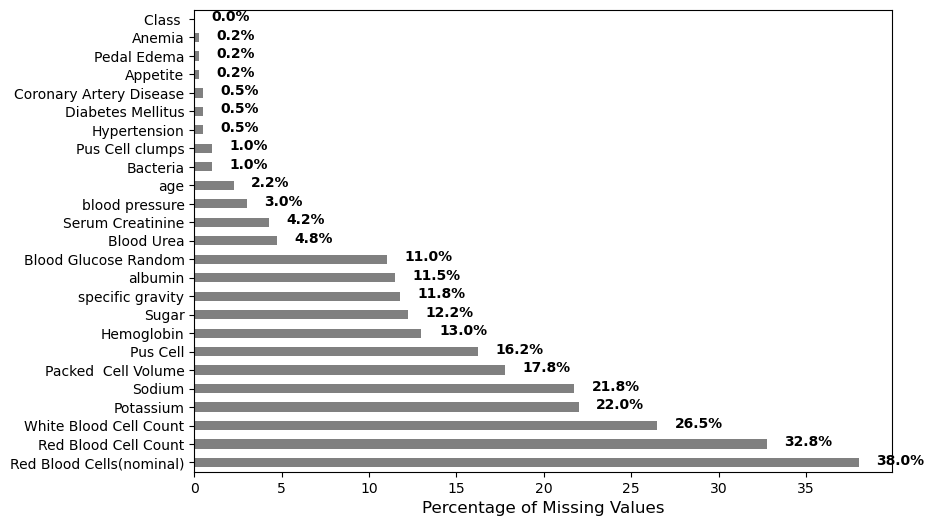

In [149]:
# Calculate percentage of missing values for each column
missing_percent = (df.isnull().sum() / len(df)) * 100

# Sort columns in ascending order of missing values
null_percent = missing_percent.sort_values(ascending=False)

# plot horizontal bar chart
fig, ax = plt.subplots(figsize=(9, 6))
null_percent.plot(kind='barh', color='grey')

# add data labels
for i, v in enumerate(null_percent):
    ax.text(v + 1, i - 0.1, f'{v:.1f}%', color='black', fontweight='bold')

# set x-axis label
ax.set_xlabel('Percentage of Missing Values', fontsize=12)

# show the plot
plt.show()


<html>
  <head>
    <h4 id="section1.2" style="font-family: 'Times New Roman', Times, serif;">1.2: Insights</h4>
      <body style="font-family: 'Times New Roman', Times, serif;">
          ###What the trends we are observing##
      </body>
  </head>
</html>

<div style="background-color: lightgrey; padding: 10px">
<html>
  <head>
    <h3 id="subsection-1-2-1" style="font-family: 'Times New Roman', Times, serif;">1.2.1: Removing the column</h3>
      <body style="font-family: 'Times New Roman', Times, serif;">
          Removing the column due to high percentage of missing values.
      </body>
  </head>
</html>
    </div>

In [120]:
from IPython.display import HTML

# Define the title widget
title_widget = widgets.HTML(
    value='<h2 style="font-family: Times New Roman; font-size: 20px; color: black; font-weight: bold;">Select columns to be dropped</h2>'
)

# Create a list of checkbox widgets, one for each column in the DataFrame
checkboxes = [widgets.Checkbox(description=col) for col in df.columns]

# Combine the checkboxes into a vertical box container
checkbox_vbox = widgets.VBox(children=checkboxes)

# Display the title and the checkboxes
display(title_widget)
display(checkbox_vbox)


HTML(value='<h2 style="font-family: Times New Roman; font-size: 20px; color: black; font-weight: bold;">Select…

In [151]:
from IPython.display import display, HTML

# Create a button
button = """
        <button onclick="var cells = IPython.notebook.get_cells(); 
        var current_cell_idx = IPython.notebook.get_selected_index(); 
        IPython.notebook.select(current_cell_idx+1); 
        cells[current_cell_idx+1].execute();">
        To drop the selected columns</button>
        """

# Display the button
display(HTML(button))

In [156]:
# Get the selected checkbox values as a list
cols_to_drop = [checkbox.description for checkbox in checkboxes if checkbox.value]

try:
    df = df.drop(columns=cols_to_drop)
    display(df.head().style.format("{:.2f}").set_table_styles([{'selector': 'th', 'props': [('background-color', 'lightcyan')]}]).\
set_properties(**{'border': '1px solid black', 'text-align': 'center', 'vertical-align': 'middle'}))
    
except:
    print('Columns already dropped!')
    display(df.head().style.format("{:.2f}").set_table_styles([{'selector': 'th', 'props': [('background-color', 'lightcyan')]}]).\
set_properties(**{'border': '1px solid black', 'text-align': 'center', 'vertical-align': 'middle'}))


Columns already dropped!


,age,blood pressure,specific gravity,albumin,Sugar,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count
0,48.00,80.00,1.02,1.00,0.00,121.00,36.00,1.20,nan,nan,15.40,44.00,7800.00,5.20
1,7.00,50.00,1.02,4.00,0.00,nan,18.00,0.80,nan,nan,11.30,38.00,6000.00,nan
2,62.00,80.00,1.01,2.00,3.00,423.00,53.00,1.80,nan,nan,9.60,31.00,7500.00,nan
3,48.00,70.00,1.00,4.00,0.00,117.00,56.00,3.80,111.00,2.50,11.20,32.00,6700.00,3.90
4,51.00,80.00,1.01,2.00,0.00,106.00,26.00,1.40,nan,nan,11.60,35.00,7300.00,4.60
